# Scholastic Case Study

### Goal: Modeling
- Use binary classification to predict DC schools
    - Definition: Subscription rates dropped 50% or more between 2017 and 2019
- Examine metrics and feature importance

### Resources
Scholastic Red = #e40404

### Setup

In [81]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [82]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

In [83]:
# Plotting specs
matplotlib.rcParams['figure.figsize'] = 12, 8
plt.rcParams['figure.dpi'] = 300
sns.set()

In [84]:
# Display entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Load Data

In [85]:
selected_features = pd.read_csv('Data/selected_features.csv', index_col=0)

In [86]:
selected_features.head()

,hhi,order_amount_delta,bookclub_rev_delta,revenue_ed_group_delta,teacher_count_delta,grd_3,grd_4,class
0,0.159713,4.367848e-20,0.001022,0.001341,6.797284e-18,0.60,0.45,0.0
1,0.131550,5.358635e-20,0.000856,0.001341,7.552538e-18,0.00,0.00,0.0
2,0.127436,2.183572e-18,0.001405,0.001341,1.480297e-16,0.39,0.35,0.0
3,0.103899,4.181908e-20,0.000615,0.001341,1.762259e-18,0.27,0.37,0.0
4,0.080696,1.032413e-19,0.001466,0.001341,5.286776e-18,0.02,0.23,0.0


In [87]:
# No nulls
selected_features.isnull().sum().sum()

0

## Data Split

In [88]:
target = selected_features.pop('class')

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
									selected_features, target,
								test_size=0.2, random_state=0)

In [90]:
models = [LogisticRegression(), SVC(), LinearSVC(), GaussianNB(),
	RandomForestClassifier(), KNeighborsClassifier()]

In [91]:
acc, f1, precision, recall = [], [], [], []

In [92]:
for model in models:
	name = str(model)
	model = model.fit(X_train, y_train)
	preds = model.predict(X_test)
	
	acc_temp, f1_temp, precision_temp, recall_temp = \
	accuracy_score(preds, y_test), f1_score(preds, y_test), \
	precision_score(preds, y_test), recall_score(preds, y_test)
	
	acc.append(acc_temp)
	f1.append(f1_temp)
	precision.append(precision_temp)
	recall.append(recall_temp)
	
print('All models scored')

/Users/shifraisaacs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shifraisaacs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shifraisaacs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


All models scored


In [93]:
model_results = DataFrame({'model': models, 'accuracy': acc,
							'f1': f1, 'precision': precision, 'recall': recall})

In [94]:
model_results

,model,accuracy,f1,precision,recall
0,LogisticRegression(),0.774366,0.000000,0.000000,0.000000
1,SVC(),0.774366,0.000000,0.000000,0.000000
2,LinearSVC(),0.774366,0.000000,0.000000,0.000000
3,GaussianNB(),0.240628,0.369404,0.985759,0.227289
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.757230,0.063361,0.036392,0.244681
5,KNeighborsClassifier(),0.735809,0.153318,0.106013,0.276860


## Feature Importance in Logistic Regression Model

In [102]:
model = GaussianNB()

In [103]:
model.fit(X_train, y_train)

GaussianNB()

In [108]:
imps = permutation_importance(model, X_test, y_test)
feat_imp = DataFrame({'Feature': selected_features.columns, 'Importance': imps.importances_mean.flatten(),
					  'Importance (Abs)':abs(imps.importances_mean.flatten())})
feat_imp = feat_imp.sort_values(by='Importance (Abs)', ascending=False)
feat_imp

,Feature,Importance,Importance (Abs)
1,order_amount_delta,0.002356,0.002356
4,teacher_count_delta,-0.001214,0.001214
6,grd_4,-0.000428,0.000428
2,bookclub_rev_delta,0.000357,0.000357
5,grd_3,-0.000214,0.000214
0,hhi,-0.000143,0.000143
3,revenue_ed_group_delta,-0.000071,0.000071


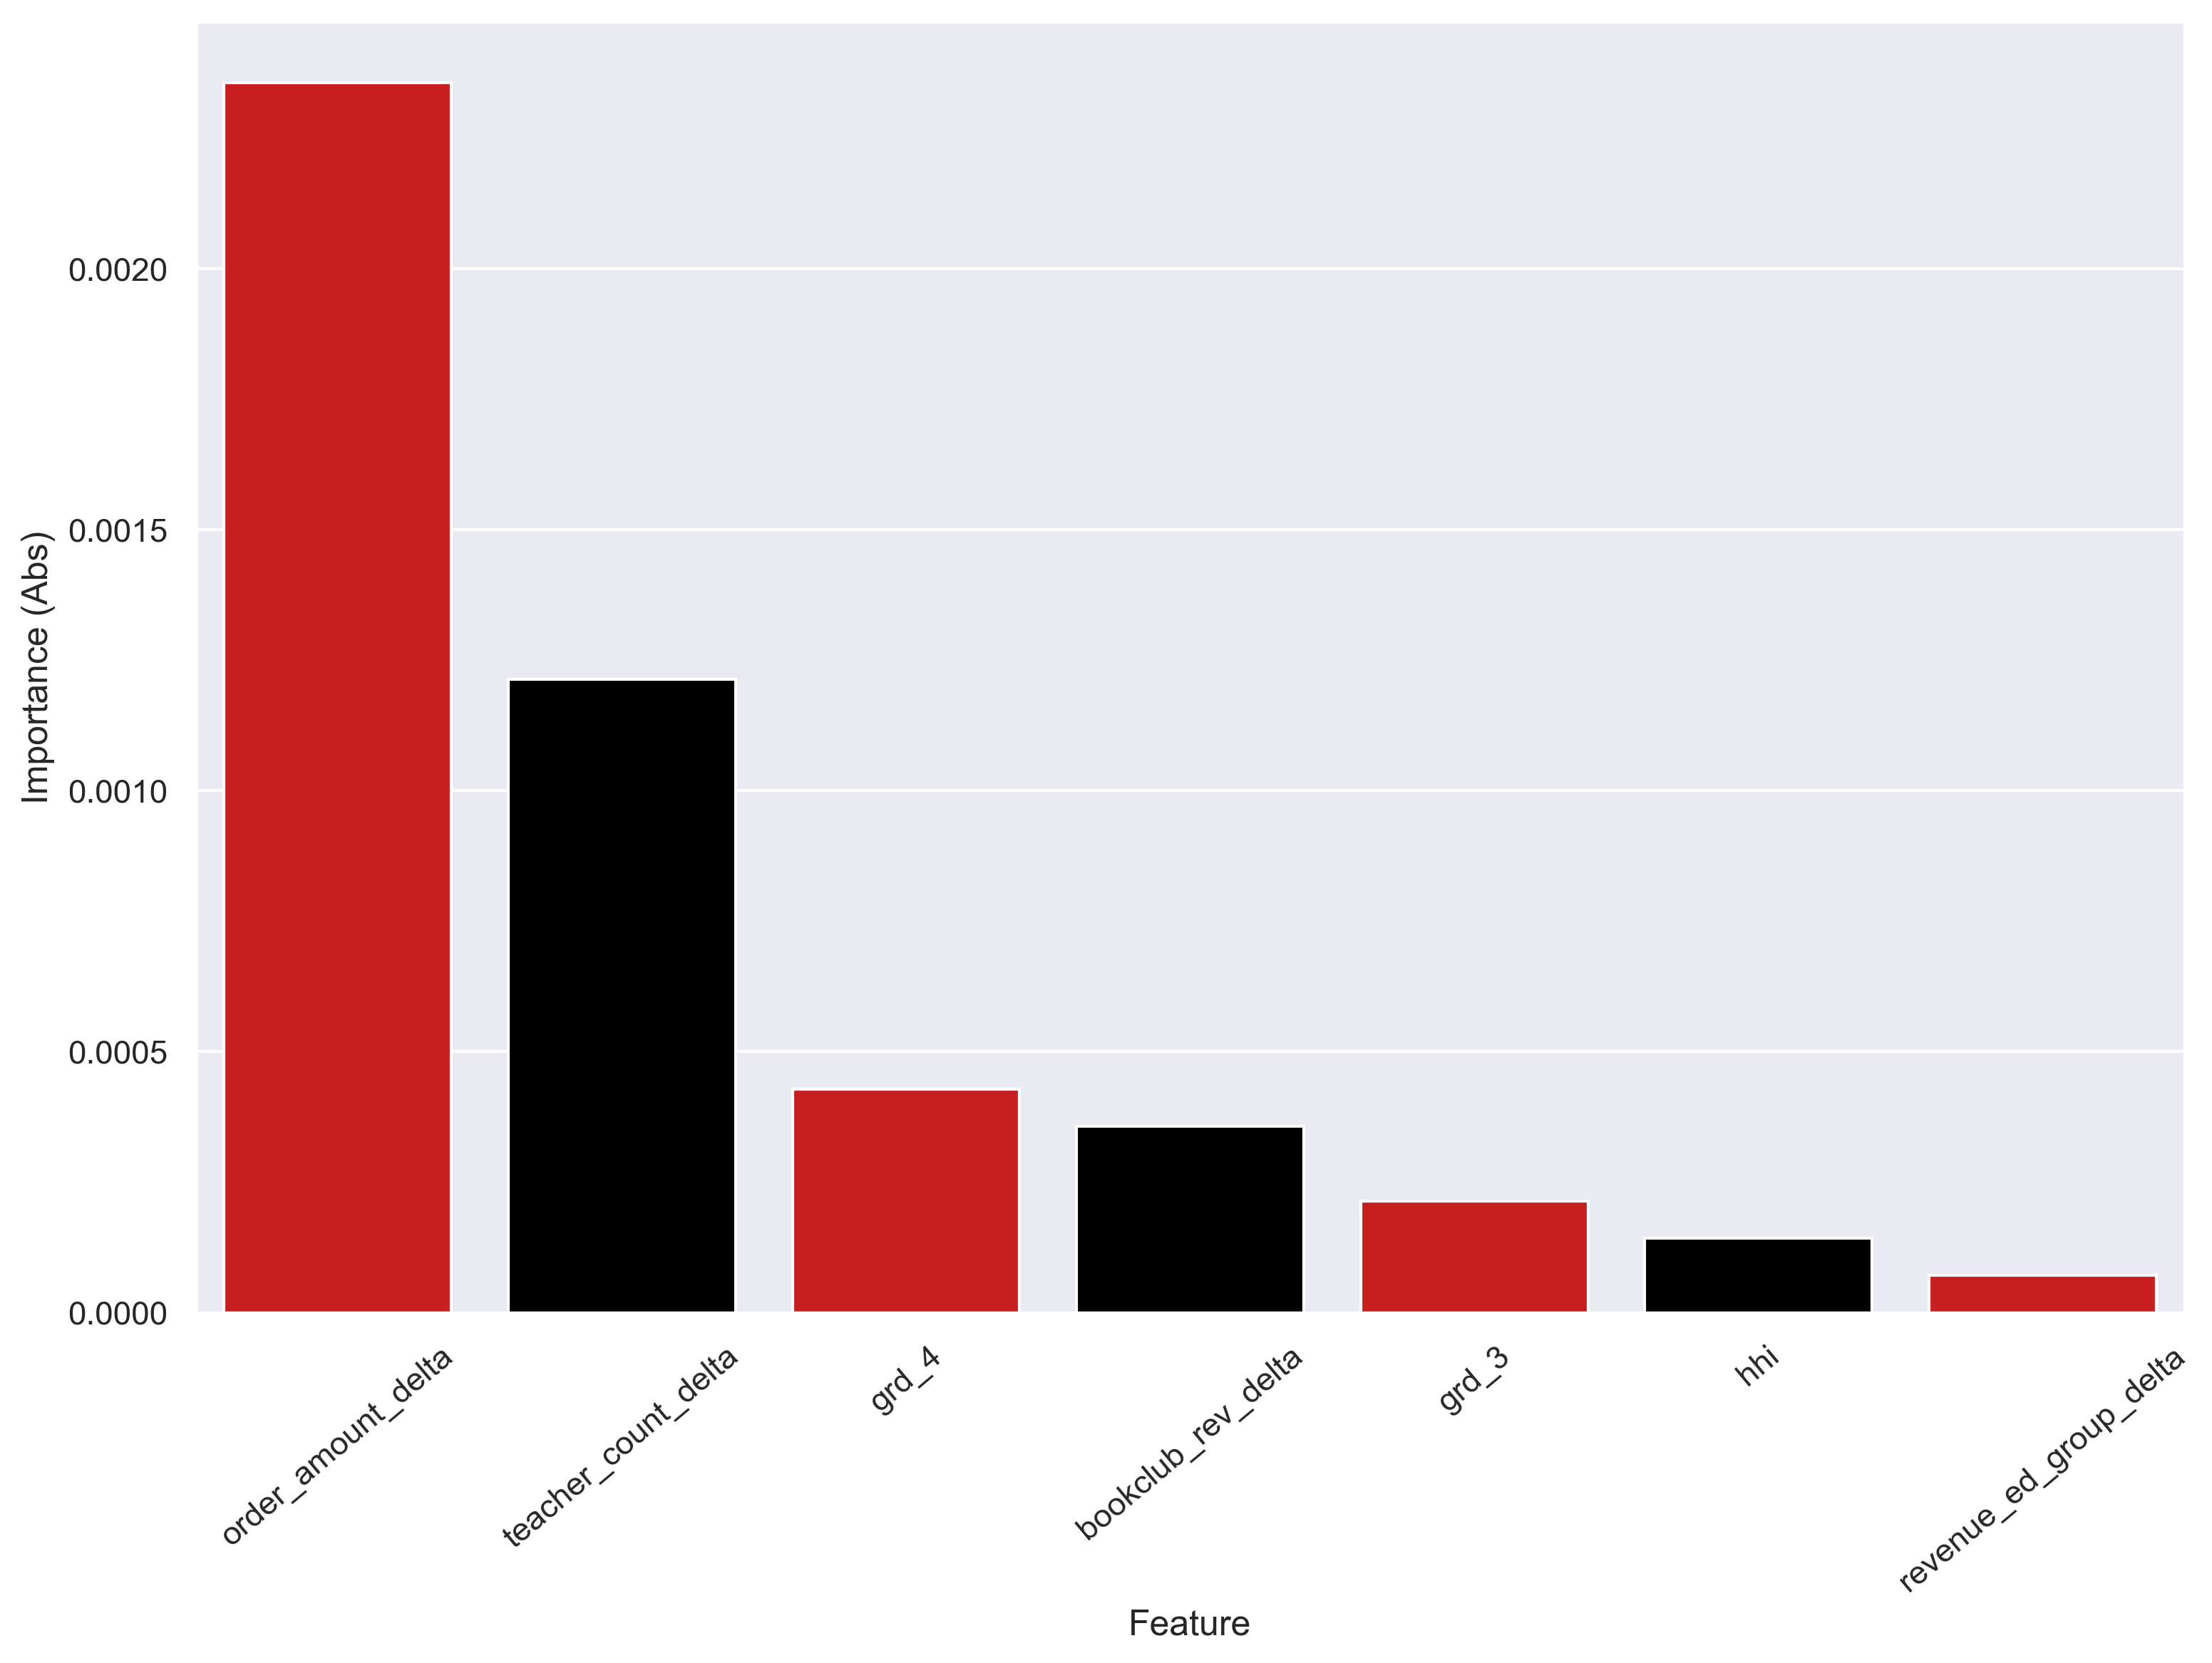

In [109]:
plt.xticks(rotation=40)
features = sns.barplot(data=feat_imp, x='Feature',
					   y='Importance (Abs)', palette=['#e40404', 'black'])